In [1]:
# Run this cell to configure Tensorflow to use your GPU
import tensorflow as tf
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2021-10-02 18:53:28.632310: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-02 18:53:28.685754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 18:53:28.686569: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-10-02 18:53:28.686836: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-02 18:53:28.689037: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-02 18:53:28.691209: I tensorflow/stream_executor/platform/defaul

In [2]:
# See https://keras.io/applications for details
from tensorflow.python.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
model = VGG16()

# Other models to try:
# from tensorflow.python.keras.applications.vgg19 import VGG19, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet121, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet169, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet201, decode_predictions, preprocess_input

2021-10-02 18:53:28.744343: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-02 18:53:28.752887: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300005000 Hz
2021-10-02 18:53:28.753258: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562cb4626e20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-02 18:53:28.753283: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-02 18:53:28.753654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-02 18:53:28.754507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tes

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# Uncomments to look at the model's weights. It's a list of very large tensors!
# model.weights

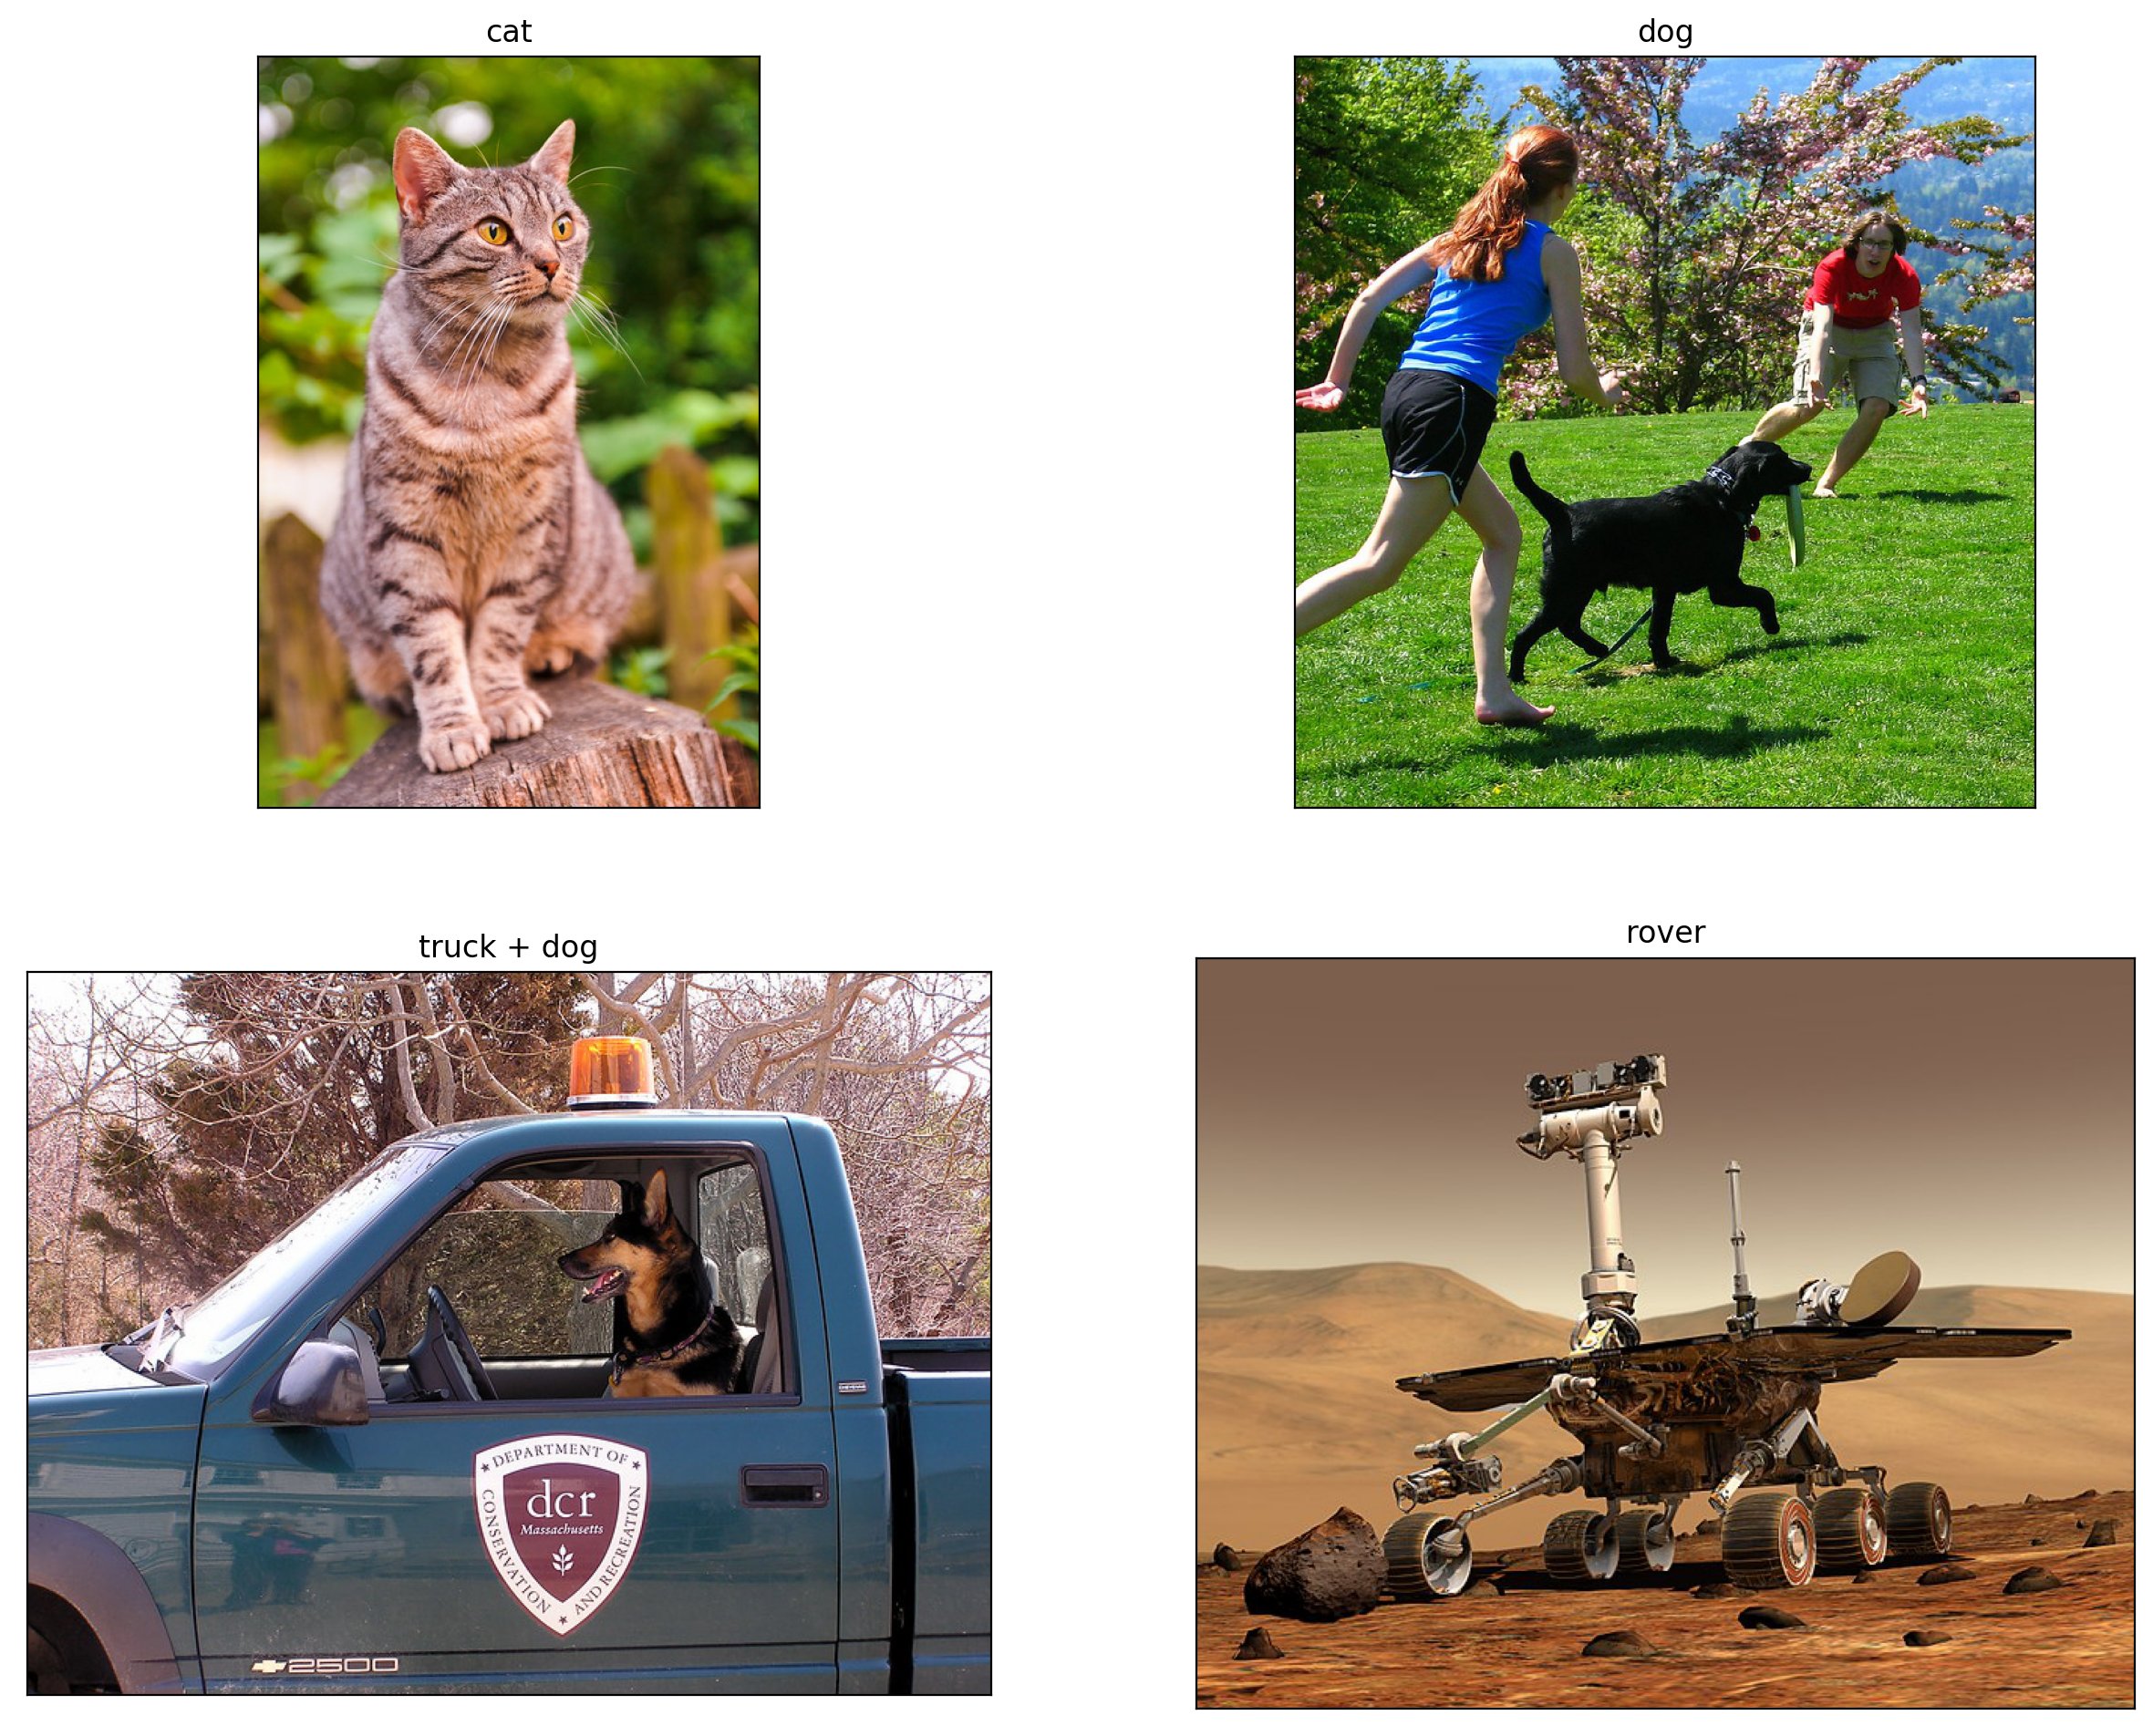

In [5]:
from utils.plot import *

# Loads a tiny batch of images from Internet
images_raw = load_tiny_batch()
plot_images_grid(images_raw)

In [6]:
import numpy as np

# Cropped and/or resized into ImageNet shape 224x224x3 array of type uint8 [0, 255]
images_resized = np.array([crop_and_resize_for_imagenet(i) for i in images_raw.values()])

# Rescaled RGB distribution to match ImageNet
images_rescaled = preprocess_input(images_resized)

In [7]:
images_rescaled.shape

(4, 224, 224, 3)

In [8]:
import pandas as pd

# Returns shape (?, 1000) array of floats
predictions_raw = model.predict(images_rescaled)

# Fetch list of top-5 likelihood labels
decoded_top5 = decode_predictions(predictions_raw, top=5)

report_by_name = {
    name: pd.DataFrame(
        prediction, 
        columns=['class ID', 'class label', 'probability']
    )
    for name, prediction in zip(images_raw.keys(), decoded_top5)
}

2021-10-02 18:55:01.728471: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-02 18:55:17.270372: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


40960/35363 [==================================] - 0s 0us/step


class ID   class label  probability
0  n02123159     tiger_cat     0.714243
1  n02124075  Egyptian_cat     0.188262
2  n02123045         tabby     0.093697
3  n02127052          lynx     0.002473
4  n02123394   Persian_cat     0.000084

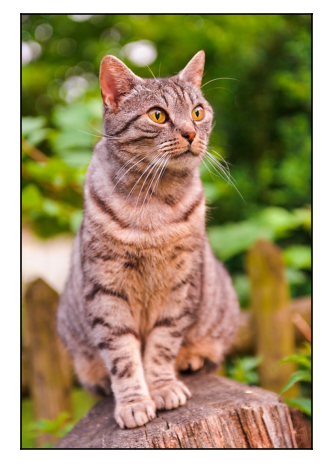

In [9]:
# Displays the model's predicted classes.

plot_image(images_raw['cat'])
report_by_name['cat']

class ID         class label  probability
0  n02097130     giant_schnauzer     0.441688
1  n02113799     standard_poodle     0.070821
2  n02093859  Kerry_blue_terrier     0.066942
3  n02097209  standard_schnauzer     0.044242
4  n02101006       Gordon_setter     0.038339

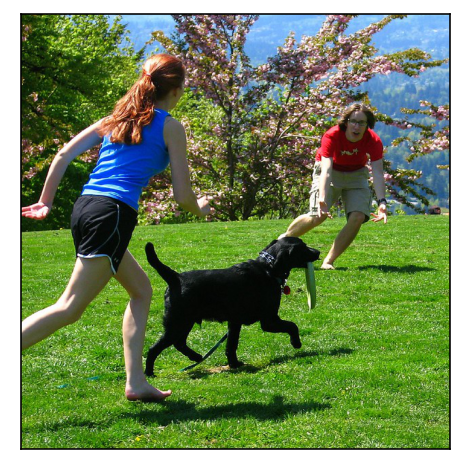

In [10]:
# People were not one of the classes in ImageNet 1K

plot_image(images_raw['dog'])
report_by_name['dog']

class ID class label  probability
0  n03930630      pickup     0.656913
1  n04461696   tow_truck     0.178180
2  n03770679     minivan     0.050219
3  n03594945        jeep     0.024458
4  n04252225    snowplow     0.018116

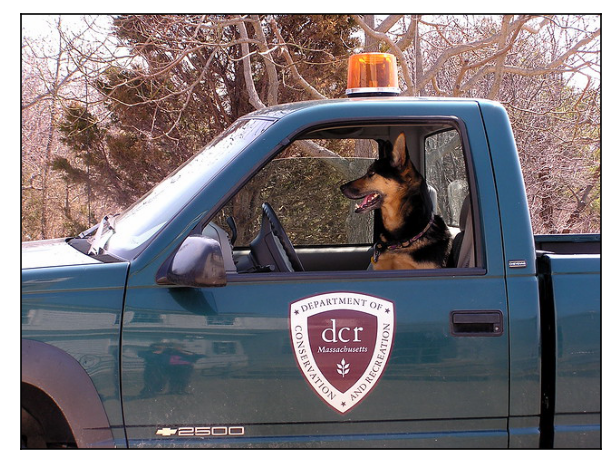

In [11]:
# The model was not able to find the dog, only the truck.

plot_image(images_raw['truck + dog'])
report_by_name['truck + dog']

class ID class label  probability
0  n04389033        tank     0.365948
1  n03786901      mortar     0.272740
2  n03954731       plane     0.065525
3  n04090263       rifle     0.047894
4  n02950826      cannon     0.030502

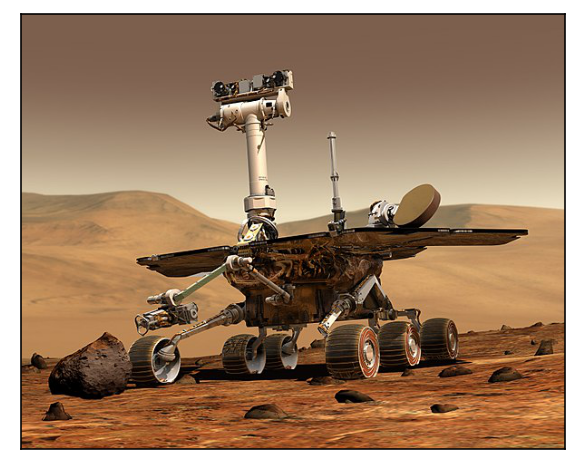

In [12]:
# Rovers are definitely not one of the 1K classes in ImageNet.
# It is insightful to see what the models thinks the rover looks like, though.

plot_image(images_raw['rover'])
report_by_name['rover']